In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from matplotlib.pylab import rcParams
rcParams[ 'figure.figsize' ]=20,10

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))







In [2]:
from nsepy import get_history
from datetime import date


In [3]:
def obtain_data(ticker,start,end):
# Enter the start and end dates using the method date(yyyy,m,dd)    
    stock=get_history(symbol=ticker,start=start,end=end)
    df=stock.copy()
    df=df.reset_index()
    df=df.drop(['Series','Prev Close','Last','Turnover','Trades',
                'VWAP', 'Volume', 'Deliverable Volume', 'Symbol','%Deliverble'],
               axis=1)
    df.index=df.Date
    return df

In [4]:
df=obtain_data('BAJFINANCE',date(2017,10,8),date(2018,10,8))


In [5]:
df

,Date,Open,High,Low,Close
Date,,,,,
2017-10-09,2017-10-09,1928.0,1954.00,1916.00,1941.30
2017-10-10,2017-10-10,1944.0,1959.40,1943.00,1950.80
2017-10-11,2017-10-11,1967.0,1967.00,1901.95,1923.55
2017-10-12,2017-10-12,1940.0,1957.75,1923.00,1953.15
2017-10-13,2017-10-13,1955.1,1973.70,1948.45,1953.05
...,...,...,...,...,...
2018-10-01,2018-10-01,2168.0,2233.35,2052.20,2208.50
2018-10-03,2018-10-03,2200.0,2329.95,2166.05,2232.20
2018-10-04,2018-10-04,2169.0,2212.00,2118.55,2179.15


In [6]:
df["Date"]=pd.to_datetime(df.Date)
df.index=df['Date']
df

,Date,Open,High,Low,Close
Date,,,,,
2017-10-09,2017-10-09,1928.0,1954.00,1916.00,1941.30
2017-10-10,2017-10-10,1944.0,1959.40,1943.00,1950.80
2017-10-11,2017-10-11,1967.0,1967.00,1901.95,1923.55
2017-10-12,2017-10-12,1940.0,1957.75,1923.00,1953.15
2017-10-13,2017-10-13,1955.1,1973.70,1948.45,1953.05
...,...,...,...,...,...
2018-10-01,2018-10-01,2168.0,2233.35,2052.20,2208.50
2018-10-03,2018-10-03,2200.0,2329.95,2166.05,2232.20
2018-10-04,2018-10-04,2169.0,2212.00,2118.55,2179.15


In [7]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [8]:
train_value = len(df) * 2 // 3

In [9]:

# open data
open_data=df.sort_index(ascending=True,axis=0)
new_open_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date',"Open"])

for i in range(0,len(open_data)):
    new_open_dataset["Date"][i]=open_data['Date'][i]
    new_open_dataset["Open"][i]=open_data["Open"][i]
    
print(new_open_dataset)
new_open_dataset.index=new_open_dataset.Date
new_open_dataset.drop("Date",axis=1,inplace=True)

final_open_dataset=new_open_dataset.values

train_open_data=final_open_dataset[0:train_value,:]
valid_open_data=final_open_dataset[train_value:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_open_data=scaler.fit_transform(final_open_dataset)

x_train_open_data,y_train_open_data=[],[]

for i in range(60,len(train_open_data)):
    x_train_open_data.append(scaled_open_data[i-60:i,0])
    y_train_open_data.append(scaled_open_data[i,0])
    
x_train_open_data,y_train_open_data=np.array(x_train_open_data),np.array(y_train_open_data)

x_train_open_data=np.reshape(x_train_open_data,(x_train_open_data.shape[0],x_train_open_data.shape[1],1))


# high data
high_data=df.sort_index(ascending=True,axis=0)
new_high_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date',"High"])

for i in range(0,len(high_data)):
    new_high_dataset["Date"][i]=high_data['Date'][i]
    new_high_dataset["High"][i]=high_data["High"][i]
    
new_original_dataset = new_high_dataset.copy()
new_high_dataset.index=new_high_dataset.Date
new_high_dataset.drop("Date",axis=1,inplace=True)

final_high_dataset=new_high_dataset.values

train_high_data=final_high_dataset[0:train_value,:]
valid_high_data=final_high_dataset[train_value:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_high_data=scaler.fit_transform(final_high_dataset)

x_train_high_data,y_train_high_data=[],[]

for i in range(60,len(train_high_data)):
    x_train_high_data.append(scaled_high_data[i-60:i,0])
    y_train_high_data.append(scaled_high_data[i,0])
    
x_train_high_data,y_train_high_data=np.array(x_train_high_data),np.array(y_train_high_data)

x_train_high_data=np.reshape(x_train_high_data,(x_train_high_data.shape[0],x_train_high_data.shape[1],1))


# low data
low_data=df.sort_index(ascending=True,axis=0)
new_low_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date',"Low"])

for i in range(0,len(high_data)):
    new_low_dataset["Date"][i]=low_data['Date'][i]
    new_low_dataset["Low"][i]=low_data["Low"][i]
    
new_prediction_dataset=new_low_dataset.copy()

new_low_dataset.index=new_low_dataset.Date
new_low_dataset.drop("Date",axis=1,inplace=True)

final_low_dataset=new_low_dataset.values

train_low_data=final_low_dataset[0:train_value,:]
valid_low_data=final_low_dataset[train_value:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_low_data=scaler.fit_transform(final_low_dataset)

x_train_low_data,y_train_low_data=[],[]

for i in range(60,len(train_low_data)):
    x_train_low_data.append(scaled_low_data[i-60:i,0])
    y_train_low_data.append(scaled_low_data[i,0])
    
x_train_low_data,y_train_low_data=np.array(x_train_low_data),np.array(y_train_low_data)

x_train_low_data=np.reshape(x_train_low_data,(x_train_low_data.shape[0],x_train_low_data.shape[1],1))



# close data

close_data=df.sort_index(ascending=True,axis=0)
new_close_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date',"Close"])

for i in range(0,len(close_data)):
    new_close_dataset["Date"][i]=close_data['Date'][i]
    new_close_dataset["Close"][i]=close_data["Close"][i]
    

new_close_dataset.index=new_close_dataset.Date
new_close_dataset.drop("Date",axis=1,inplace=True)

final_close_dataset=new_close_dataset.values

train_close_data=final_close_dataset[0:train_value,:]
valid_close_data=final_close_dataset[train_value:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_close_data=scaler.fit_transform(final_close_dataset)

x_train_close_data,y_train_close_data=[],[]

for i in range(60,len(train_close_data)):
    x_train_close_data.append(scaled_close_data[i-60:i,0])
    y_train_close_data.append(scaled_close_data[i,0])
    
x_train_close_data,y_train_close_data=np.array(x_train_close_data),np.array(y_train_close_data)

x_train_close_data=np.reshape(x_train_close_data,(x_train_close_data.shape[0],x_train_close_data.shape[1],1))



                    Date    Open
0    2017-10-09 00:00:00  1928.0
1    2017-10-10 00:00:00  1944.0
2    2017-10-11 00:00:00  1967.0
3    2017-10-12 00:00:00  1940.0
4    2017-10-13 00:00:00  1955.1
..                   ...     ...
243  2018-10-01 00:00:00  2168.0
244  2018-10-03 00:00:00  2200.0
245  2018-10-04 00:00:00  2169.0
246  2018-10-05 00:00:00  2160.0
247  2018-10-08 00:00:00  1992.0

[248 rows x 2 columns]


In [10]:

# open
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_open_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_open_data,y_train_open_data,epochs=1,batch_size=1,verbose=2)

inputs_open_data=new_open_dataset[len(new_open_dataset)-len(valid_open_data)-60:].values
inputs_open_data=inputs_open_data.reshape(-1,1)
inputs_open_data=scaler.transform(inputs_open_data)


# high
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_close_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_high_data,y_train_high_data,epochs=1,batch_size=1,verbose=2)

inputs_high_data=new_high_dataset[len(new_high_dataset)-len(valid_high_data)-60:].values
inputs_high_data=inputs_high_data.reshape(-1,1)
inputs_high_data=scaler.transform(inputs_high_data)

# low
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_low_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_low_data,y_train_low_data,epochs=1,batch_size=1,verbose=2)

inputs_low_data=new_low_dataset[len(new_low_dataset)-len(valid_low_data)-60:].values
inputs_low_data=inputs_low_data.reshape(-1,1)
inputs_low_data=scaler.transform(inputs_low_data)



#close
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_close_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_close_data,y_train_close_data,epochs=1,batch_size=1,verbose=2)

inputs_close_data=new_close_dataset[len(new_close_dataset)-len(valid_close_data)-60:].values
inputs_close_data=inputs_close_data.reshape(-1,1)
inputs_close_data=scaler.transform(inputs_close_data)






105/105 - 3s - loss: 0.0053
105/105 - 3s - loss: 0.0061
105/105 - 3s - loss: 0.0073
105/105 - 4s - loss: 0.0063


In [11]:

# open
X_open_test=[]
for i in range(60,inputs_open_data.shape[0]):
    X_open_test.append(inputs_open_data[i-60:i,0])
X_open_test=np.array(X_open_test)

X_open_test=np.reshape(X_open_test,(X_open_test.shape[0],X_open_test.shape[1],1))
prediction_opening=lstm_model.predict(X_open_test)
prediction_opening=scaler.inverse_transform(prediction_opening)





#high
X_high_test=[]
for i in range(60,inputs_high_data.shape[0]):
    X_high_test.append(inputs_high_data[i-60:i,0])
X_high_test=np.array(X_high_test)

X_high_test=np.reshape(X_high_test,(X_high_test.shape[0],X_high_test.shape[1],1))
prediction_high=lstm_model.predict(X_high_test)
prediction_high=scaler.inverse_transform(prediction_high)


#low
X_low_test=[]
for i in range(60,inputs_low_data.shape[0]):
    X_low_test.append(inputs_low_data[i-60:i,0])
X_low_test=np.array(X_low_test)

X_low_test=np.reshape(X_low_test,(X_low_test.shape[0],X_low_test.shape[1],1))
prediction_low=lstm_model.predict(X_low_test)
prediction_low=scaler.inverse_transform(prediction_low)

#close
X_close_test=[]
for i in range(60,inputs_close_data.shape[0]):
    X_close_test.append(inputs_close_data[i-60:i,0])
X_close_test=np.array(X_close_test)

X_close_test=np.reshape(X_close_test,(X_close_test.shape[0],X_close_test.shape[1],1))
prediction_closing=lstm_model.predict(X_close_test)
prediction_closing=scaler.inverse_transform(prediction_closing)


In [12]:
lstm_model.save("saved_lstm_model.h5")


In [13]:
train_open_data=new_open_dataset[:train_value]
valid_open_data=new_open_dataset[train_value:]
valid_open_data['Predictions']=prediction_opening
# plt.plot(train_open_data["Open"])
# plt.plot(valid_open_data[['Open',"Predictions"]]) # prediction-blue
# prediction_opening


<ipython-input-13-5063e69e0750>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_open_data['Predictions']=prediction_opening


In [14]:

train_high_data=new_high_dataset[:train_value]
valid_high_data=new_high_dataset[train_value:]
valid_high_data['Predictions']=prediction_high
# plt.plot(train_high_data["High"])
# plt.plot(valid_high_data[["High","Predictions"]]) # prediction-blue



<ipython-input-14-7ddf9166500a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_high_data['Predictions']=prediction_high


In [15]:

train_low_data=new_low_dataset[:train_value]
valid_low_data=new_low_dataset[train_value:]
valid_low_data['Predictions']=prediction_low
# plt.plot(train_low_data["Low"])
# plt.plot(valid_low_data[["Low","Predictions"]])  # prediction-blue  low-orange

<ipython-input-15-842bec1f2b07>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_low_data['Predictions']=prediction_low


<ipython-input-22-5ff3bb013b8d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_close_data['Predictions']=prediction_closing


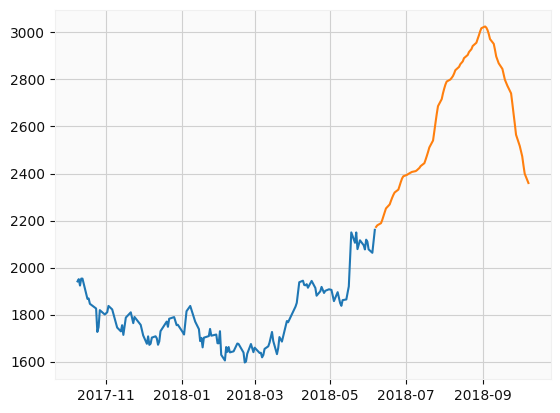

In [22]:

train_close_data=new_close_dataset[:train_value]
valid_close_data=new_close_dataset[train_value:]
valid_close_data['Predictions']=prediction_closing
plt.plot(train_close_data["Close"])
plt.plot(valid_close_data[["Predictions"]]) # prediction-blue


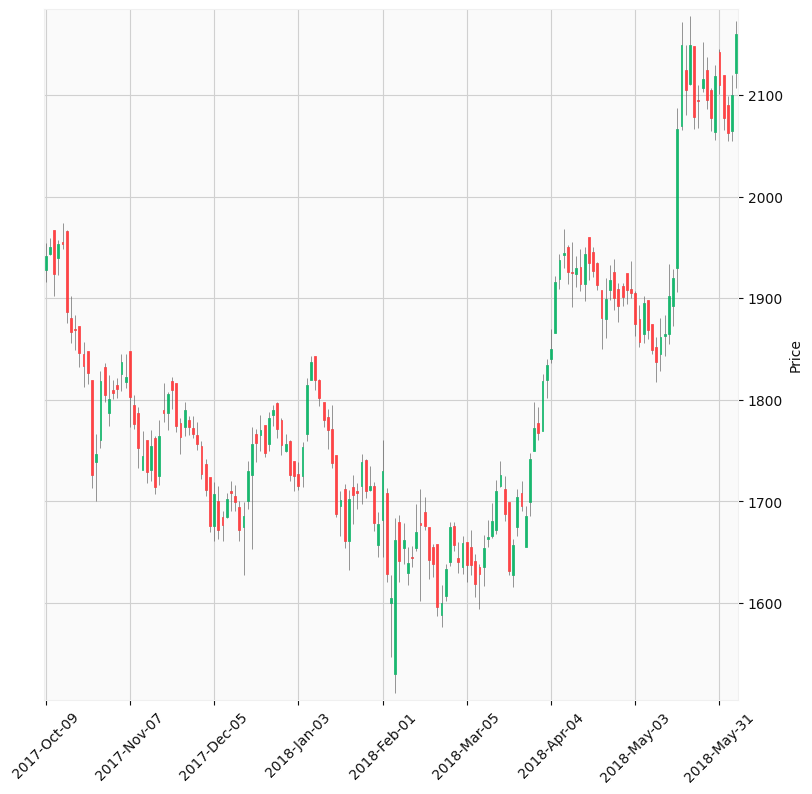

In [17]:
# plotting of training dataset

import mplfinance as mpl
# Calling DataFrame constructor  
df = pd.DataFrame({
    'Date': [i for i in new_original_dataset[:train_value]['Date']],
                   'Open': [i for i in train_open_data['Open']],
                   'High': [i for i in train_high_data['High']],
                   'Low': [i for i in train_low_data['Low']],
                   'Close': [i for i in train_close_data['Close']],
                   
                  })  

df.Date = pd.to_datetime(df.Date)


df = df.set_index('Date')

# # [2017:09 : 2018:02]
mpl.plot(df, type='candle', style='yahoo',
        tight_layout=True,
        figsize=(8,8))


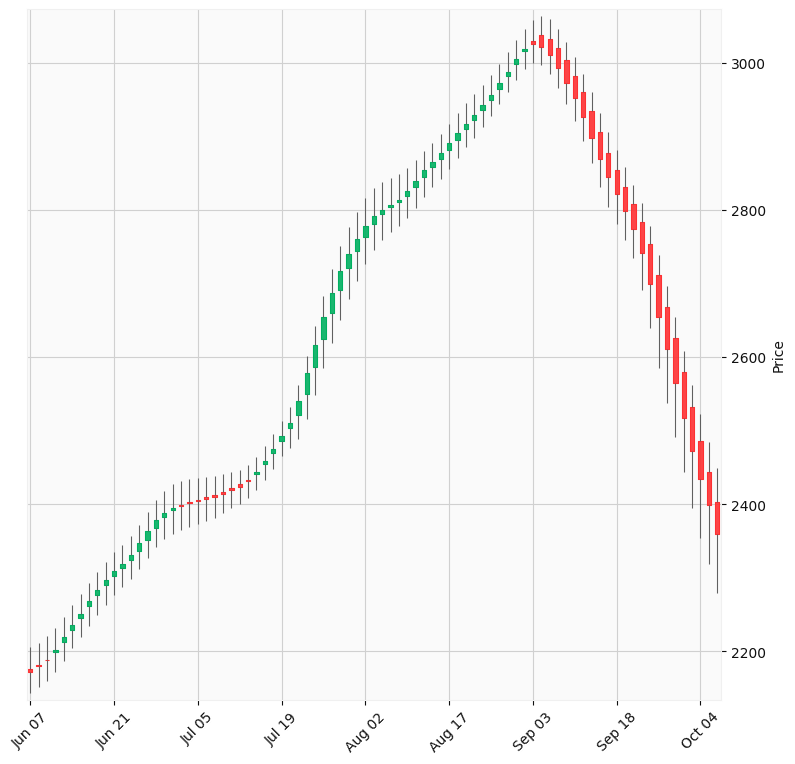

In [18]:
# data which we predicted

import mplfinance as mpl
# Calling DataFrame constructor  
df = pd.DataFrame({
    'Date': [i for i in new_prediction_dataset[train_value:]['Date']],
                   'Open': [i for i in valid_open_data['Predictions']],
                   'High': [i for i in valid_high_data['Predictions']],
                   'Low': [i for i in valid_low_data['Predictions']],
                   'Close': [i for i in valid_close_data['Predictions']],
                   
                  })  

df.Date = pd.to_datetime(df.Date, format="%Y-%m-%s")


df = df.set_index('Date')

# # [2017:09 : 2018:02]
mpl.plot(df, type='candle', style='yahoo',
        tight_layout=True,
        figsize=(8,8))



         Date    Open     High      Low    Close
0  2018-06-07  2172.0  2197.20  2160.15  2169.45
1  2018-06-08  2164.9  2219.95  2147.05  2186.85
2  2018-06-11  2210.0  2258.50  2196.20  2250.30
3  2018-06-12  2255.0  2277.00  2236.00  2261.25
4  2018-06-13  2270.0  2271.60  2225.70  2231.05
..        ...     ...      ...      ...      ...
78 2018-10-01  2168.0  2233.35  2052.20  2208.50
79 2018-10-03  2200.0  2329.95  2166.05  2232.20
80 2018-10-04  2169.0  2212.00  2118.55  2179.15
81 2018-10-05  2160.0  2214.60  1963.25  2023.30
82 2018-10-08  1992.0  2090.00  1912.20  1974.85

[83 rows x 5 columns]


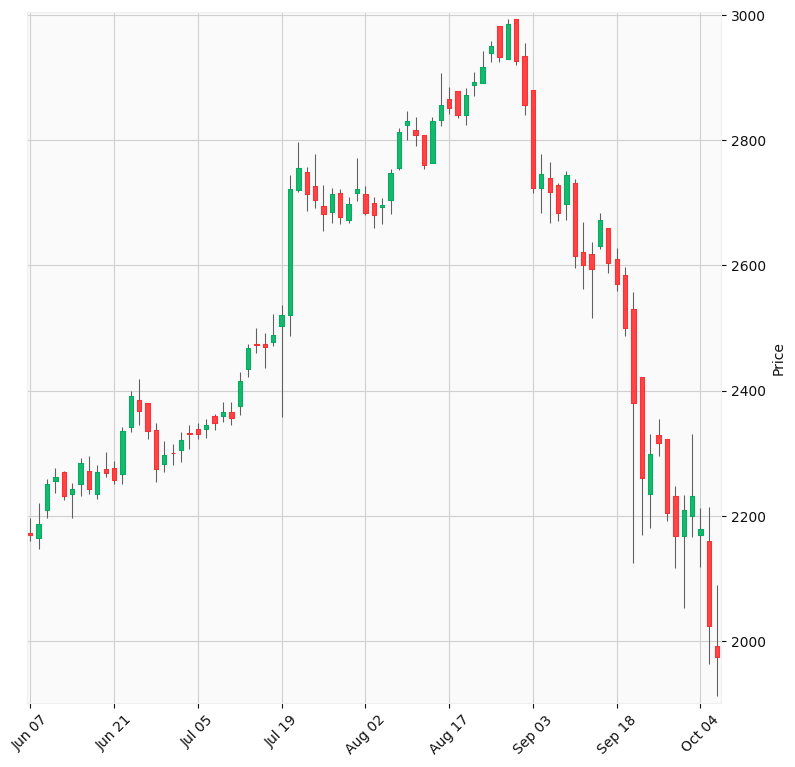

In [19]:
# original data plotting 

import mplfinance as mpl
# Calling DataFrame constructor  
df = pd.DataFrame({
    'Date': [i for i in new_prediction_dataset[train_value:]['Date']],
                   'Open': [i for i in valid_open_data['Open']],
                   'High': [i for i in valid_high_data['High']],
                   'Low': [i for i in valid_low_data['Low']],
                   'Close': [i for i in valid_close_data['Close']],
                   
                  })  
print(df)
df.Date = pd.to_datetime(df.Date)


df = df.set_index('Date')

# # [2017:09 : 2018:02]
mpl.plot(df, type='candle', style='yahoo',
        tight_layout=True,
        figsize=(8,8))

